In [1]:
import os
import copy
import csv
import numpy as np
import pandas as pd
import brainbox.io.one as bbone
import ibllib.atlas as atlas
import pickle
from one.api import ONE
one = ONE(base_url='https://alyx.internationalbrainlab.org')

C:\Users\Dan\.conda\envs\iblenv\lib\site-packages\one\api.py:1294: UserWarning: Newer cache tables require ONE version 1.10.0 or greater
  warnings.warn(f'Newer cache tables require ONE version {min_version} or greater')


In [2]:
def get_bwm_sessions():

    '''
    Gaelle, 06.04.2022
    '''

    str_query = (  
       'session__project__name__icontains,ibl_neuropixel_brainwide_01,'
       'session__json__IS_MOCK,False,session__qc__lt'
       ',50,~json__qc,CRITICAL,'
       'session__extended_qc__behavior,1,'
       'json__extended_qc__tracing_exists,True,'
       '~session__extended_qc___task_stimOn_goCue_delays__lt,0.9,'
       '~session__extended_qc___task_response_feedback_delays__lt,0.9,'
       '~session__extended_qc___task_wheel_move_before_feedback__lt,0.9,'
       '~session__extended_qc___task_wheel_freeze_during_quiescence__lt,0.9,'
       '~session__extended_qc___task_error_trial_event_sequence__lt,0.9,'
       '~session__extended_qc___task_correct_trial_event_sequence__lt,0.9,'
       '~session__extended_qc___task_reward_volumes__lt,0.9,'
       '~session__extended_qc___task_reward_volume_set__lt,0.9,'
       '~session__extended_qc___task_stimulus_move_before_goCue__lt,0.9,'
       '~session__extended_qc___task_audio_pre_trial__lt,0.9')                  
        
    str_query2 = (
       'session__project__name__icontains,ibl_neuropixel_brainwide_01,'
       'session__json__IS_MOCK,False,session__qc__lt,50,'
       '~json__qc,CRITICAL,session__extended_qc__behavior,1,'       
       'json__extended_qc__tracing_exists,True,'
       'session__extended_qc___experimenter_task,PASS')        
            
    ins = np.concatenate([one.alyx.rest('insertions', 'list', django = x)
                          for x in [str_query, str_query2]])

    eid_probe = set([x['session']+'_'+x['name'] for x in ins]) # pid via x['id']
    ins = [x.split('_') for x in eid_probe] 
 
    return ins

In [4]:
ins = get_bwm_sessions()

In [8]:
with open("bwm_eid.pkl",'wb') as f:
    pickle.dump(ins, f)

In [12]:
from brainbox.io.one import SpikeSortingLoader


In [ ]:
eids = np.load("data/brainwide_map_eids_ephys_histology.npy")


In [ ]:
# Load the UUID index file
with open(UUID_TO_INDEX_PATH, 'rb') as uuid_file:
  uuids = pickle.load(uuid_file)

In [ ]:
sess_info = one.alyx.rest("sessions","list")
eid2lab = {}
for sess in sess_info:
    eid = one.to_eid(sess['url'])
    eid2lab[eid] = sess['lab']

In [16]:
# build a CSV file which tracks the UUID and lab that each cluster came from
with open('data/metadata.csv','w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  for uuid, index in uuids.items():
    eid = data['eid']
    writer.writerow([uuid, eid2lab[eid]])

TypeError: 'int' object is not subscriptable

In [13]:
from matplotlib import cm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
import time

In [17]:
# Load all of the ISI_AMP csv files and populate a big matrix with the cluster count data
# then plot slices of this to look at the cluster count
isi_amp_dir = 'C:\\proj\VBL\\nptraj-ephys-server\\pipeline\\isi_amp_data\\'

files = os.listdir(isi_amp_dir)

# 528*320*456  ap/dv/lr
cluCount = np.zeros((456,528,320))

for file in files:
    df = pd.read_csv(isi_amp_dir + file)
    df.reset_index()
    for i,row in df.iterrows():
        cluCount[int(row['ml']/40),int(row['ap']/40),int(row['dv']/40)] = row['clu_count']

In [209]:
# New plan:
# Load each ISI_AMP file and save each leaf node area separately as a CSV
# Average the ISI distribution for that area (or do PCA on it?)

isi_amp_dir = 'C:\proj\IBL\cluster_pipelines\data\isi_amp_data'
files = os.listdir(isi_amp_dir)

df = pd.read_csv('C:\proj\IBL\cluster_pipelines\data\isi_amp_data\\' + files[0])
# dictionary containing area data
areaData = pd.DataFrame(columns=['area',df.columns[9:].values])
i = 0

for file in files:
    df = pd.read_csv('C:\proj\IBL\cluster_pipelines\data\isi_amp_data\\' + file)
    df.reset_index()
    for i,row in df.iterrows():
        area = row['atlas_id']
        data = row[9:].values
        areaData.loc[i] = [area, data]
        i += 1

AttributeError: 'numpy.float64' object has no attribute 'values'

In [203]:
for area in areaDict.keys():
    areaData = areaDict[area]
    areaMean = np.average(areaData,axis=0)
    #np.savetxt('C:\proj\IBL\cluster_pipelines\data\isi_amp_areas\\' + str(area) + '.csv',areaData,delimiter=',')

In [216]:
np.average(areaDict[0],axis=0)

array([0.02462212, 0.04363561, 0.10895899, 0.15841355, 0.15662258,
       0.15228122, 0.12637609, 0.10094896, 0.0703425 , 0.05779838])

In [213]:
areaMean = np.average(areaData,axis=0)


C:\Users\Dan\.conda\envs\iblenv\lib\site-packages\numpy\lib\function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)


ZeroDivisionError: division by zero

In [210]:
area

512.0

In [211]:
data

array([5.78268664e-04, 1.34929355e-03, 8.23069065e-03, 9.80281039e-01,
       9.31012548e-03, 9.63781106e-05, 7.71024885e-05, 7.71024885e-05,
       0.00000000e+00, 0.00000000e+00])

In [212]:
[area,data]

[512.0,
 array([5.78268664e-04, 1.34929355e-03, 8.23069065e-03, 9.80281039e-01,
        9.31012548e-03, 9.63781106e-05, 7.71024885e-05, 7.71024885e-05,
        0.00000000e+00, 0.00000000e+00])]

In [24]:
from needles2.probe_model import ProbeModel

res = 25
pr = ProbeModel(res=res)
pr.initialise()
pr.compute_best_for_provenance(provenance='Histology track')
coverage = pr.report_coverage(provenance='Best', dist=354)

C:\Users\Dan\.conda\envs\iblenv\lib\site-packages\one\api.py:1294: UserWarning: Newer cache tables require ONE version 1.10.0 or greater
  warnings.warn(f'Newer cache tables require ONE version {min_version} or greater')


12.831583976745605
12.851388216018677
0.06364798545837402
20.514261960983276
0.027907609939575195
0.015633821487426758
0.38724660873413086
0.08876204490661621
0.0
0.037243947858473
0.074487895716946
0.11173184357541899
0.148975791433892
0.186219739292365
0.22346368715083798
0.260707635009311
0.297951582867784
0.33519553072625696
0.37243947858473
0.409683426443203
0.44692737430167595
0.48417132216014896
0.521415270018622
0.5586592178770949
0.595903165735568
0.633147113594041
0.6703910614525139
0.707635009310987
0.74487895716946
0.7821229050279329
0.819366852886406
0.8566108007448789
0.8938547486033519
0.931098696461825
0.9683426443202979


In [25]:
coverage.shape

(528, 456, 320)

In [128]:
coverage = coverage.swapaxes(1,2)
print(coverage.shape)

(528, 320, 456)


In [129]:
# We're going to load the data_indexes.bytes file and then use those positions to save out the coverage dataset in the same way we did the annotation dataset, and index file and a map filem
volume_indexes = np.fromfile('./compression/volume_indexes.bytes',dtype='uint8')

In [130]:
volume_indexes.shape

(77045760,)

In [157]:
# Go through the flattened file and at each point where data_indexes==1, save whether that was a 0/1/2, we can use the map here this will help let Unity compress the file further
coverage_flat = coverage.flatten()
coverage_map = [0,1,2]

In [160]:
coverage_indexes = coverage_flat[volume_indexes==1]

In [163]:
print(np.sum(coverage_indexes==0))
print(np.sum(coverage_indexes==1))
print(np.sum(coverage_indexes==2))

17033968
3891276
11462141
0


In [164]:
coverage_indexes.astype('uint8').tofile('coverage_indexes.bytes')

In [165]:
volume_indexes_load = np.fromfile('./compression/volume_indexes.bytes',dtype='uint8')
coverage_indexes_load = np.fromfile('coverage_indexes.bytes',dtype='uint8')

In [166]:
# Reconstruct the coverage volume
ai = 0
i = 0
cov_load = np.zeros(data.shape)
for ap in np.arange(data.shape[0]):
    for dv in np.arange(data.shape[1]):
        for lr in np.arange(data.shape[2]):
            if volume_indexes_load[i]==1:
                cov_load[ap,dv,lr] = coverage_indexes_load[ai]
                ai+=1
            else:
                cov_load[ap,dv,lr] = np.nan
            i+=1

In [167]:
print(np.all(coverage==cov_load))

False


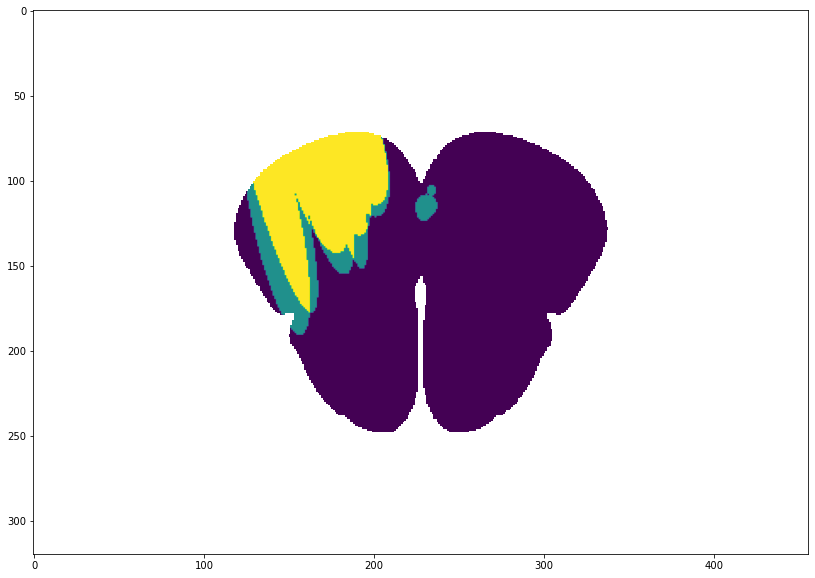

In [168]:
plt.imshow(cov_load[100,:,:])

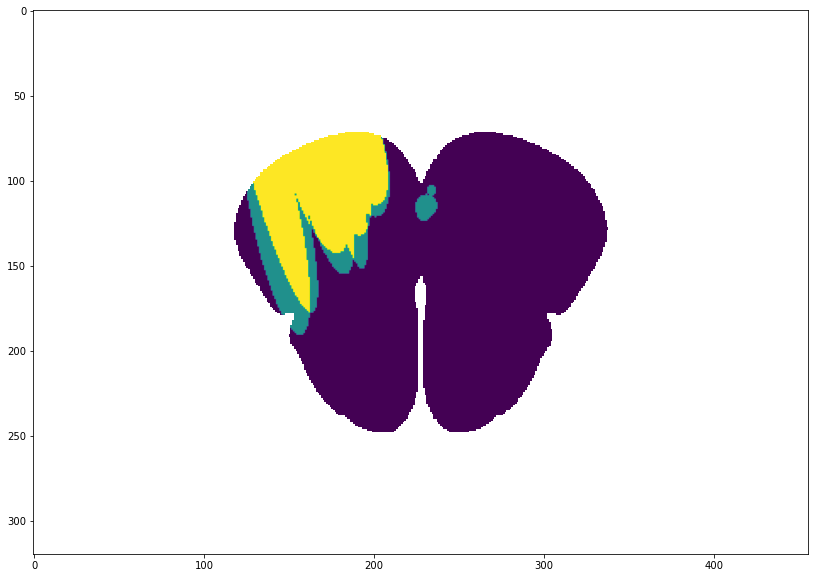

In [169]:
plt.imshow(coverage[100,:,:])